In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice

%matplotlib inline

In [202]:
entrenamiento_df = pd.read_csv('setDeDatos/nlp-getting-started/train.csv')

In [203]:
entrenamiento_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [204]:
entrenamiento_df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [205]:
entrenamiento_df['keyword'].value_counts().head(10)

fatalities     45
deluge         42
armageddon     42
harm           41
damage         41
body%20bags    41
sinking        41
evacuate       40
fear           40
siren          40
Name: keyword, dtype: int64

In [206]:
entrenamiento_df['location'].value_counts().head(10)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: location, dtype: int64

In [207]:
entrenamiento_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [208]:
# Quito la columna 'text' y la reemplazo por la columna  
# 'longitud_text' que contiene la longitud de la columna 'text'. 
entrenamiento_df['text']=entrenamiento_df['text'].astype(str)
entrenamiento_df['longitud_text']=entrenamiento_df.text.str.len()
#entrenamiento_df=entrenamiento_df[['id','keyword','location','target','longitud_text']]
entrenamiento_df.head(10)


,id,keyword,location,text,target,longitud_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52


/home/gaston/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Densidad')

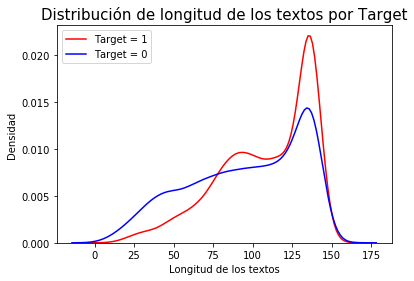

In [209]:
# hago un plot de la longitud de textos por target
plot = sns.distplot(entrenamiento_df[entrenamiento_df['target']== 1]['longitud_text'], color = 'red',hist=False, rug=False, label = 'Target = 1')
plot = sns.distplot(entrenamiento_df[entrenamiento_df['target']== 0]['longitud_text'], color = 'blue',hist=False, rug=False, label = 'Target = 0')

plot.set_title("Distribución de longitud de los textos por Target",size=15)
plot.set_xlabel('Longitud de los textos', size=10)
plot.set_ylabel('Densidad',size=10)


In [210]:
#agrupo por target y longitud del texto(promedio y cantidad). 
longitud_target = entrenamiento_df.loc[:,['longitud_text','target']].groupby('target')\
                .agg(['mean','count'])
longitud_target

longitud_text      
                mean count
target                    
0          95.706817  4342
1         108.113421  3271

In [211]:
# acomodo las columnas
level0 = longitud_target.columns.get_level_values(0)
level1 = longitud_target.columns.get_level_values(1)

longitud_target.columns= level0 + '_' + level1
longitud_target =longitud_target.reset_index()
longitud_target


,target,longitud_text_mean,longitud_text_count
0,0,95.706817,4342
1,1,108.113421,3271


Text(0, 0.5, 'Longitud')

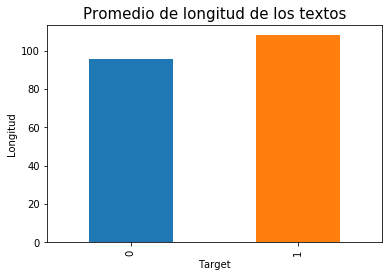

In [212]:
#grafico de promedio de longitud de los textos, por target
longitud_target_promedio= longitud_target.loc[:, 'longitud_text_mean']
longitud_target_promedio.plot(kind = 'bar')
plt.title('Promedio de longitud de los textos', size=15)
plt.xlabel('Target')
plt.ylabel('Longitud')

Text(0, 0.5, 'Cantidad')

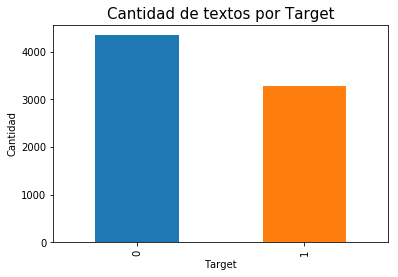

In [213]:
#grafico de cantidad de los textos, por target
longitud_target_cantidad= longitud_target.loc[:, 'longitud_text_count']
grafico=longitud_target_cantidad.plot(kind = 'bar')
plt.title('Cantidad de textos por Target', size=15)
plt.xlabel('Target')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Keyword')

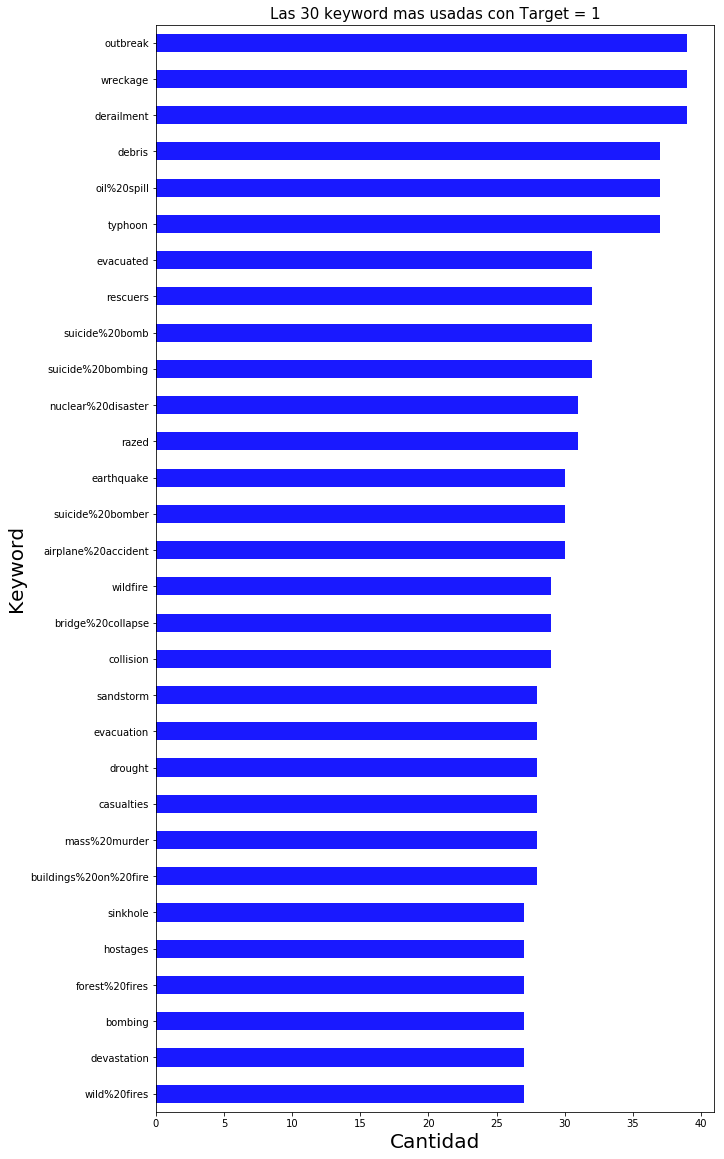

In [266]:
# Grafico con las primeras 30 keyword mas usadas de Target 1. 
plt.figure(figsize=(10, 20)) 
entrenamiento_df.keyword[entrenamiento_df.target == 1].value_counts().sort_values().tail(30)\
        .plot(kind='barh', alpha=0.9, color='blue')
plt.title("Las 30 keyword mas usadas con Target = 1",size=15)
plt.xlabel('Cantidad', size=20)
plt.ylabel('Keyword',size=20)

Text(0, 0.5, 'Keyword')

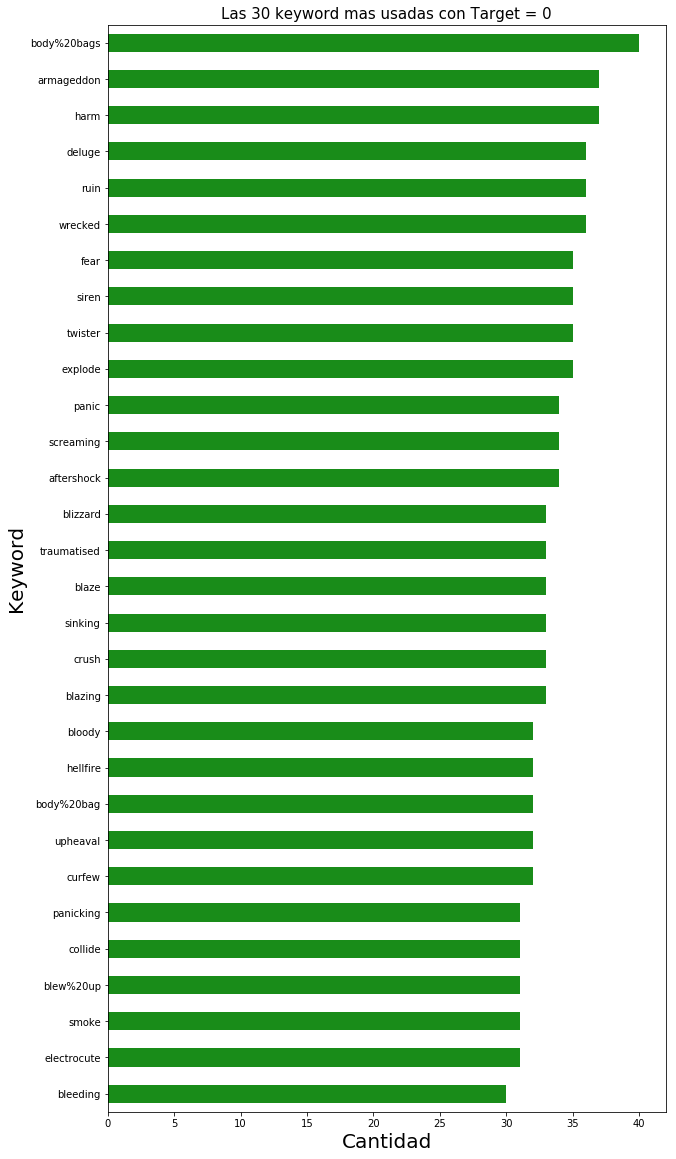

In [270]:
# Grafico con las primeras 30 keyword mas usadas de Target 0. 
plt.figure(figsize=(10, 20)) 
entrenamiento_df.keyword[entrenamiento_df.target == 0].value_counts().sort_values().tail(30)\
        .plot(kind='barh', alpha=0.9, color='green')
plt.title("Las 30 keyword mas usadas con Target = 0",size=15)
plt.xlabel('Cantidad', size=20)
plt.ylabel('Keyword',size=20)

In [217]:
# long máxima, mínima, promedio, 
    
keyword_grouped = entrenamiento_df.loc[:,['keyword','longitud_text']].groupby('keyword')\
                    .agg(['mean','count'])
keyword_grouped


longitud_text      
                             mean count
keyword                                
ablaze                  94.694444    36
accident               100.085714    35
aftershock             101.205882    34
airplane%20accident    106.400000    35
ambulance               98.394737    38
annihilated            104.470588    34
annihilation           117.689655    29
apocalypse              97.750000    32
armageddon             102.023810    42
army                   107.117647    34
arson                   97.218750    32
arsonist                76.911765    34
attack                  99.138889    36
attacked               105.714286    35
avalanche              101.200000    30
battle                  99.500000    26
bioterror              114.729730    37
bioterrorism           114.866667    30
blaze                   81.684211    38
blazing                 96.382353    34
bleeding                73.142857    35
blew%20up               80.000000    33
blight                  94.687500    32
blizzard                71.891892    37
blood                   77.514286    35
bloody                  89.371429    35
blown%20up             103.454545    33
body%20bag             125.393939    33
body%20bagging          89.939394    33
body%20bags            100.780488    41
...                           ...   ...
survivors              103.900000    30
terrorism              106.264706    34
terrorist              102.903226    31
threat                  99.818182    11
thunder                 72.868421    38
thunderstorm           106.333333    33
tornado                 91.228571    35
tragedy                111.555556    36
trapped                104.250000    32
trauma                 109.064516    31
traumatised             84.314286    35
trouble                 90.818182    33
tsunami                 85.764706    34
twister                 95.300000    40
typhoon                111.394737    38
upheaval               104.578947    38
violent%20storm        114.212121    33
volcano                110.666667    27
war%20zone              81.500000    24
weapon                  90.743590    39
weapons                115.410256    39
whirlwind              101.000000    39
wild%20fires           105.677419    31
wildfire               109.636364    33
windstorm              100.375000    40
wounded                111.054054    37
wounds                 103.363636    33
wreck                   88.540541    37
wreckage               122.256410    39
wrecked                 77.153846    39

[221 rows x 2 columns]